# Basic Statistics from Movie movies

**Metadata**

| **#** | **Column**               | **Description**                                                                                    |
|-------|--------------------------|----------------------------------------------------------------------------------------------------|
| 1     | **title**                | The official title of the movie.                                                                   |
| 2     | **release_year**         | The year when the movie was officially released.                                                   |
| 3     | **genres**               | Categories of genres the movie belongs to (can have multiple values, separated by commas).         |
| 4     | **director**             | Director(s) of the movie.                                                                          |
| 5     | **runtime**              | Duration of the movie in minutes.                                                                  |
| 6     | **language**             | The language in which the movie was originally produced.                                           |
| 7     | **original_title**       | The title of the movie in its original language.                                                   |
| 8     | **popularity**           | TMDB's score based on votes, views, searches, social engagement, and others.                       |
| 9     | **events**               | Describes events or triggers within the movie (e.g., violence, strong language).                   |
| 10    | **imdb_rating**          | Average rating of the movie on IMDb, on a scale from 0 to 10.                                      |
| 11    | **imdb_votes**           | Number of votes that contributed to the IMDb rating.                                               |
| 12    | **tmdb_rating**          | Rating of the movie on TMDB, on a scale from 0 to 10.                                              |
| 13    | **tmdb_votes**           | Number of votes that contributed to the TMDB rating.                                               |
| 14    | **budget**               | Financial budget allocated for the movie production.                                               |
| 15    | **revenue**              | Box office earnings of the movie.                                                                  |
| 16    | **profit**               | Profit of the movie, calculated as `revenue - budget`.                                             |


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [2]:
import sys
sys.path.append('../utils')
import functions

In [3]:
movies = pd.read_csv('../data/clean/movie_df.csv')
display(movies)

,title,release_year,genres,director,runtime,language,original_title,popularity,events,imdb_rating,imdb_votes,tmdb_rating,tmdb_votes,budget,revenue,profit
0,Bad Boys for Life,2020,"thriller, action, crime","Bilall Fallah, Adil El Arbi",124,English,Bad Boys for Life,67.7,"flashing lights or images, shaving or cutting,...",6.5,186716,7.1,8251,90000000,426505244,336505244
1,Avatar: The Way of Water,2022,"science fiction, adventure, action",James Cameron,192,English,Avatar: The Way of Water,158.5,"kids dying, jump scares, people being burned a...",7.5,518001,7.6,11946,460000000,2320250281,1860250281
2,Pet Sematary,2019,"horror, thriller","Dennis Widmyer, Kevin Kölsch",100,English,Pet Sematary,26.1,"dogs dying, kids dying, jump scares, people be...",5.7,100618,5.7,3186,21000000,113118226,92118226
3,How to Train Your Dragon: The Hidden World,2019,"animation, family, adventure",Dean DeBlois,104,English,How to Train Your Dragon: The Hidden World,207.5,"needles or syringes are used, dragons dying, f...",7.4,158269,7.8,6381,129000000,524580592,395580592
4,Star Wars: The Rise of Skywalker,2019,"adventure, action, science fiction",J.J. Abrams,142,English,Star Wars: The Rise of Skywalker,63.2,"jump scares, people being burned alive, flashi...",6.4,507321,6.3,9886,416000000,1074144248,658144248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,Longlegs,2024,"horror, thriller, crime",Osgood Perkins,101,English,Longlegs,153.9,"kids dying, jump scares, flashing lights or im...",6.7,141019,6.6,1475,10000000,126388179,116388179
709,Piece by Piece,2024,"animation, music, documentary",Morgan Neville,94,English,Piece by Piece,34.0,"parents dying, black guy dies first, babies/un...",6.9,3210,7.8,59,16000000,10291872,-5708128
710,Moana 2,2024,"animation, adventure, family, comedy","David G. Derrick Jr., Dana Ledoux Miller, Jaso...",100,English,Moana 2,4485.0,"flashing lights or images, ghosts, bugs, restr...",7.1,30852,6.8,424,150000000,600055655,450055655
711,Sound of Hope: The Story of Possum Trot,2024,drama,Joshua Weigel,130,English,Sound of Hope: The Story of Possum Trot,58.5,"hate speech, child abuse, minority misrepresen...",7.1,1782,6.7,23,8500000,11721425,3221425


In [4]:
print('Basic statistics for numerical columns\n')
movies.describe()

Basic statistics for numerical columns



,release_year,runtime,popularity,imdb_rating,imdb_votes,tmdb_rating,tmdb_votes,budget,revenue,profit
count,713.000000,713.000000,713.000000,713.000000,7.130000e+02,713.000000,713.000000,7.130000e+02,7.130000e+02,7.130000e+02
mean,2021.472651,113.497896,96.313745,6.406452,1.059420e+05,6.805891,2293.900421,4.879062e+07,1.255648e+08,7.677414e+07
std,1.790156,21.290798,516.792654,0.965144,1.569708e+05,0.713804,2981.086217,6.634017e+07,2.672777e+08,2.271185e+08
min,2019.000000,57.000000,3.200000,2.200000,1.290000e+02,4.100000,10.000000,8.400000e+01,6.180000e+02,-1.995460e+08
25%,2020.000000,99.000000,19.200000,5.900000,1.759700e+04,6.400000,424.000000,8.000000e+06,4.656348e+06,-5.951429e+06
50%,2022.000000,109.000000,34.000000,6.500000,5.288600e+04,6.800000,1189.000000,2.000000e+07,2.911632e+07,5.163406e+06
75%,2023.000000,125.000000,70.000000,7.000000,1.281400e+05,7.300000,2948.000000,6.000000e+07,1.219775e+08,5.896168e+07
max,2024.000000,209.000000,12656.300000,8.600000,1.565944e+06,8.700000,25781.000000,4.600000e+08,2.799439e+09,2.443439e+09


### Univariate Analysis
- Visualize the Distribution of Numerical Columns
- Check for outliers 

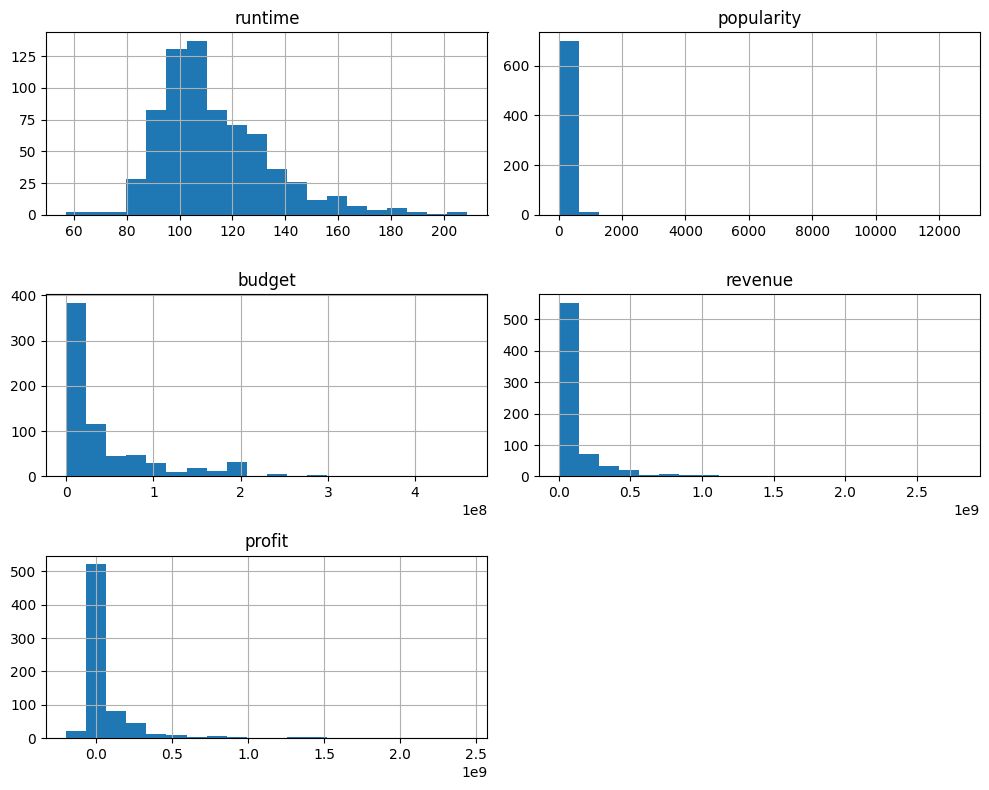

In [5]:
movies[['runtime', 'popularity', 'budget', 'revenue', 'profit']].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

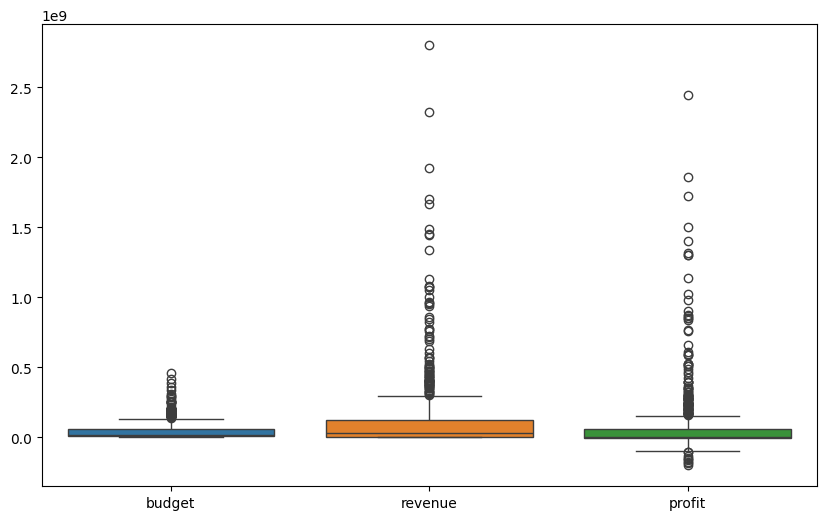

In [6]:
# detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=movies[['budget', 'revenue', 'profit']])
plt.show()

### Bivariate Analysis
Correlation Between Numerical Variables

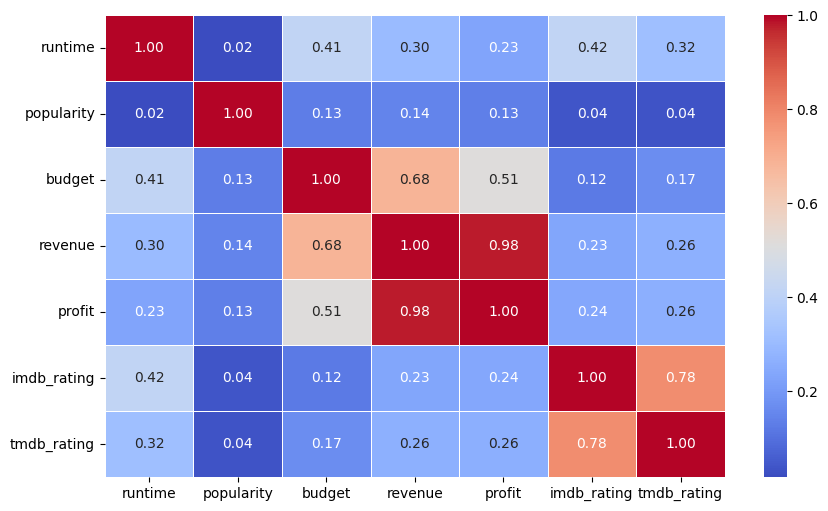

In [7]:
# correlation matrix
correlation_matrix = movies[['runtime', 'popularity', 'budget', 'revenue', 'profit', 'imdb_rating', 'tmdb_rating']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

### Categorical Data Analysis
- Most common genres
- Most frequent languages and directors

In [8]:
movies['genres'] = movies['genres'].str.split(',')
genres_flat = [genre.strip() for sublist in movies['genres'] for genre in sublist]
genre_counts = pd.Series(genres_flat).value_counts()

print('Most common genres:\n')
print(genre_counts.head(10))

Most common genres:

drama              284
action             211
comedy             206
thriller           205
horror             161
adventure          158
science fiction    104
fantasy             96
crime               93
family              79
Name: count, dtype: int64


In [9]:
print('Most frequent languages:\n')
print(movies['language'].value_counts().head(10))

print('\nMost frequent directiors:\n')
print(movies['director'].value_counts().head(10))

Most frequent languages:

language
English     614
French       30
Spanish      11
Korean        9
Hindi         7
Danish        5
Japanese      4
Chinese       4
Russian       3
Swedish       3
Name: count, dtype: int64

Most frequent directiors:

director
Guy Ritchie           5
Castille Landon       4
M. Night Shyamalan    4
Ti West               3
David Gordon Green    3
Ric Roman Waugh       3
Ridley Scott          3
Taika Waititi         3
Kenneth Branagh       3
Rob Savage            3
Name: count, dtype: int64


### Time-Based Analysis
- Release year trends
- Revenue and profit trends over time 

/tmp/ipykernel_186856/3312260538.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='release_year', data=movies, palette='viridis')


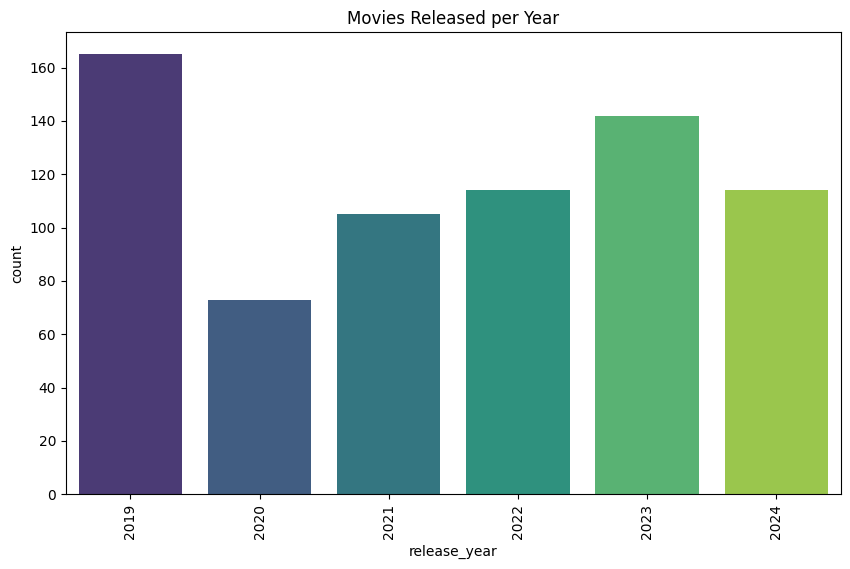

In [10]:
# distribution of movies over years
plt.figure(figsize=(10, 6))
sns.countplot(x='release_year', data=movies, palette='viridis')
plt.xticks(rotation=90)
plt.title('Movies Released per Year')
plt.show()

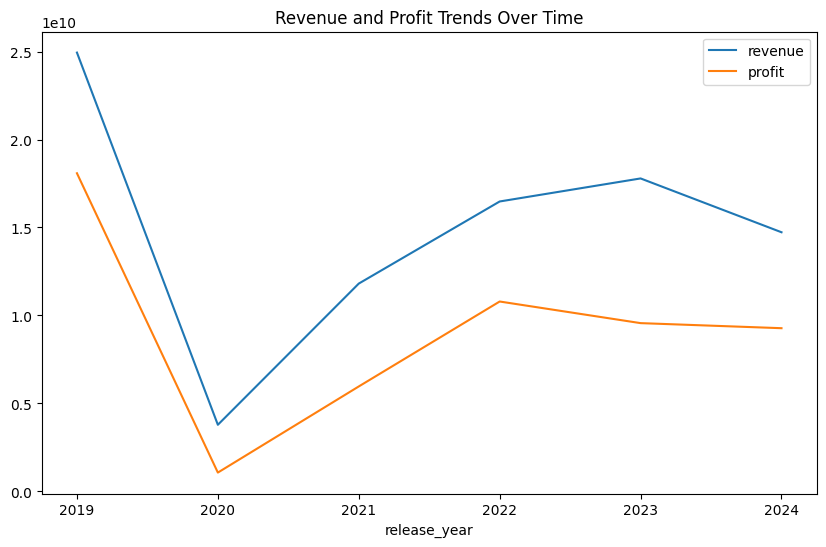

In [11]:
# revenue and profit trends over time
movies.groupby('release_year')[['revenue', 'profit']].sum().plot(kind='line', figsize=(10, 6))
plt.title('Revenue and Profit Trends Over Time')
plt.show()

### Multicollinearity
- For predictive modeling, check multicollinearity between numerical variables
- VIF (Variance Inflation Factor) for multicollinearity

In [12]:
# add constant to df
X = add_constant(movies[['runtime', 'popularity', 'budget', 'revenue', 'profit', 'imdb_rating', 'tmdb_rating']])

# calc VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

       feature         VIF
0        const  110.875143
1      runtime    1.459345
2   popularity    1.026406
3       budget         inf
4      revenue         inf
5       profit         inf
6  imdb_rating    2.882920
7  tmdb_rating    2.636713


/home/bru/Code/ironhack/movie-project/movie_env/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
